## Quant Finance - Clase 7 - Black Scholes Greeks

In [1]:
from math import log, sqrt, exp, pi
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

#### Formula de Black-Scholes:

In [2]:
def BSFormula(S_t, t, T, K, v, r, f):
    d_plus  = ( log( S_t/K ) + ( r + v**2 / 2 ) * (T-t) ) / ( v * sqrt( T-t ) )  
    d_minus = ( log( S_t/K ) + ( r - v**2 / 2 ) * (T-t) ) / ( v * sqrt( T-t ) )
    df = exp( -r * (T-t) )
    return f * ( norm.cdf(f * d_plus) * S_t - norm.cdf(f * d_minus) * K * df )

#### Seteamos los parametros fijos:

In [3]:
t = 0 
T = 1
K = 50
v = 0.5
r = 0.1
drift = 0.5
f = 1 # setea una call

## Delta

In [4]:
N = 1000

S = np.linspace(1, 100, N+1)

d_plus = [( log( S[i]/K ) + ( r + v**2 / 2 ) * (T-t) ) / ( v * sqrt( T-t ) ) for i in range(N+1)]

delta_call = [norm.cdf(f * d_plus[i])  for i in range(N+1)]
delta_put = [norm.cdf(f * d_plus[i]) - 1  for i in range(N+1)]

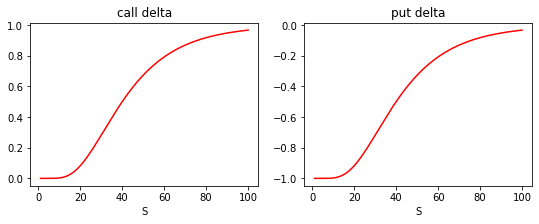

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

axs[0].plot(S, delta_call, 'r')
axs[0].set_title('call delta')
axs[0].set_xlabel('S')
axs[0].set_ylabel('')

axs[1].plot(S, delta_put, 'r')
axs[1].set_title('put delta')
axs[1].set_xlabel('S')
axs[1].set_ylabel('')
plt.show()

## Theta

In [6]:
d_minus = [( log( S[i]/K ) + ( r - v**2 / 2 ) * (T-t) ) / ( v * sqrt( T-t ) ) for i in range(N+1)]


theta_call = [- S[i] * exp (- d_plus[i] * d_plus[i] / 2 ) * v / (2*sqrt(2*pi*(T-t))) - r * K * exp(- r * (T-t)) * norm.cdf(d_minus[i])  for i in range(N+1)]


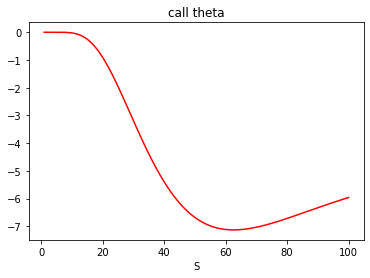

In [7]:
plt.plot(S, theta_call, 'r')
plt.title('call theta')
plt.xlabel('S')
plt.ylabel('')

plt.show()

In [12]:
N = 1000

tt = np.linspace(0, 0.999, N+1)

def d_plus_(S_t, tt, T, K, v, r):
    return [( log( S_t/K ) + ( r + v**2 / 2 ) * (T-tt[i]) ) / ( v * sqrt( T-tt[i] ) ) for i in range(N+1)]

def d_minus_(S_t, tt, T, K, v, r):
    return [( log( S_t/K ) + ( r - v**2 / 2 ) * (T-tt[i]) ) / ( v * sqrt( T-tt[i] ) ) for i in range(N+1)]

def theta_call_(S_t, d_plus_, d_minus_, tt, T, K, v, r):
    return [- S_t * exp (- d_plus_[i] * d_plus_[i] / 2 ) * v / (2*sqrt(2*pi*(T-tt[i]))) - r * K * exp(- r * (T-tt[i])) * norm.cdf(d_minus_[i])  for i in range(N+1)] 

S_t = 45
d_plus_OTM = d_plus_(S_t, tt, T, K, v, r)
d_minus_OTM = d_minus_(S_t, tt, T, K, v, r)
theta_call_OTM = theta_call_(S_t, d_plus_OTM, d_minus_OTM, tt, T, K, v, r)

S_t = 50
d_plus_ATM = d_plus_(S_t, tt, T, K, v, r)
d_minus_ATM = d_minus_(S_t, tt, T, K, v, r)
theta_call_ATM = theta_call_(S_t, d_plus_ATM, d_minus_ATM, tt, T, K, v, r)

S_t = 55
d_plus_ITM = d_plus_(S_t, tt, T, K, v, r)
d_minus_ITM = d_minus_(S_t, tt, T, K, v, r)
theta_call_ITM = theta_call_(S_t, d_plus_ITM, d_minus_ITM, tt, T, K, v, r)

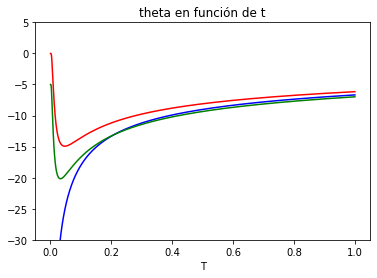

In [13]:
plt.plot(1 - tt, theta_call_OTM, 'r')
plt.plot(1 - tt, theta_call_ATM, 'b')
plt.plot(1 - tt, theta_call_ITM, 'g')

plt.title('theta en función de t')
plt.xlabel('T')
plt.ylabel('')
plt.ylim(-30,5)

plt.show()

## Gamma

In [10]:
gamma_call = [ exp (- d_plus[i] * d_plus[i] / 2 ) / (sqrt(2*pi*(T-t)))/ S[i] / v for i in range(N+1)]


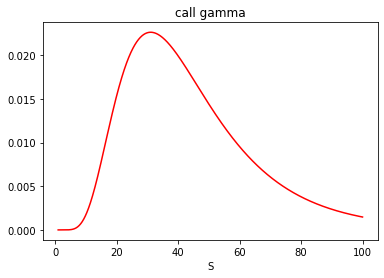

In [11]:
plt.plot(S, gamma_call, 'r')
plt.title('call gamma')
plt.xlabel('S')
plt.ylabel('')

plt.show()